In [ ]:
# Importing the packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Loading the csv file while also removing any duplicated and missing values
store_data = pd.read_csv('SampleSuperstore.csv').drop_duplicates().dropna(how = 'all', axis = 1)
display(store_data.head(10))

# Checking for the info of the data
store_data.info()

The store_data has no missing values but we did see some duplicated values tho, we had a total number of 9994 rows but due to the duplicated values it went down to 9977 and yeah it was 17 duplicated values. The datatypes are in order and i don't need to do any modifications

<Axes: >

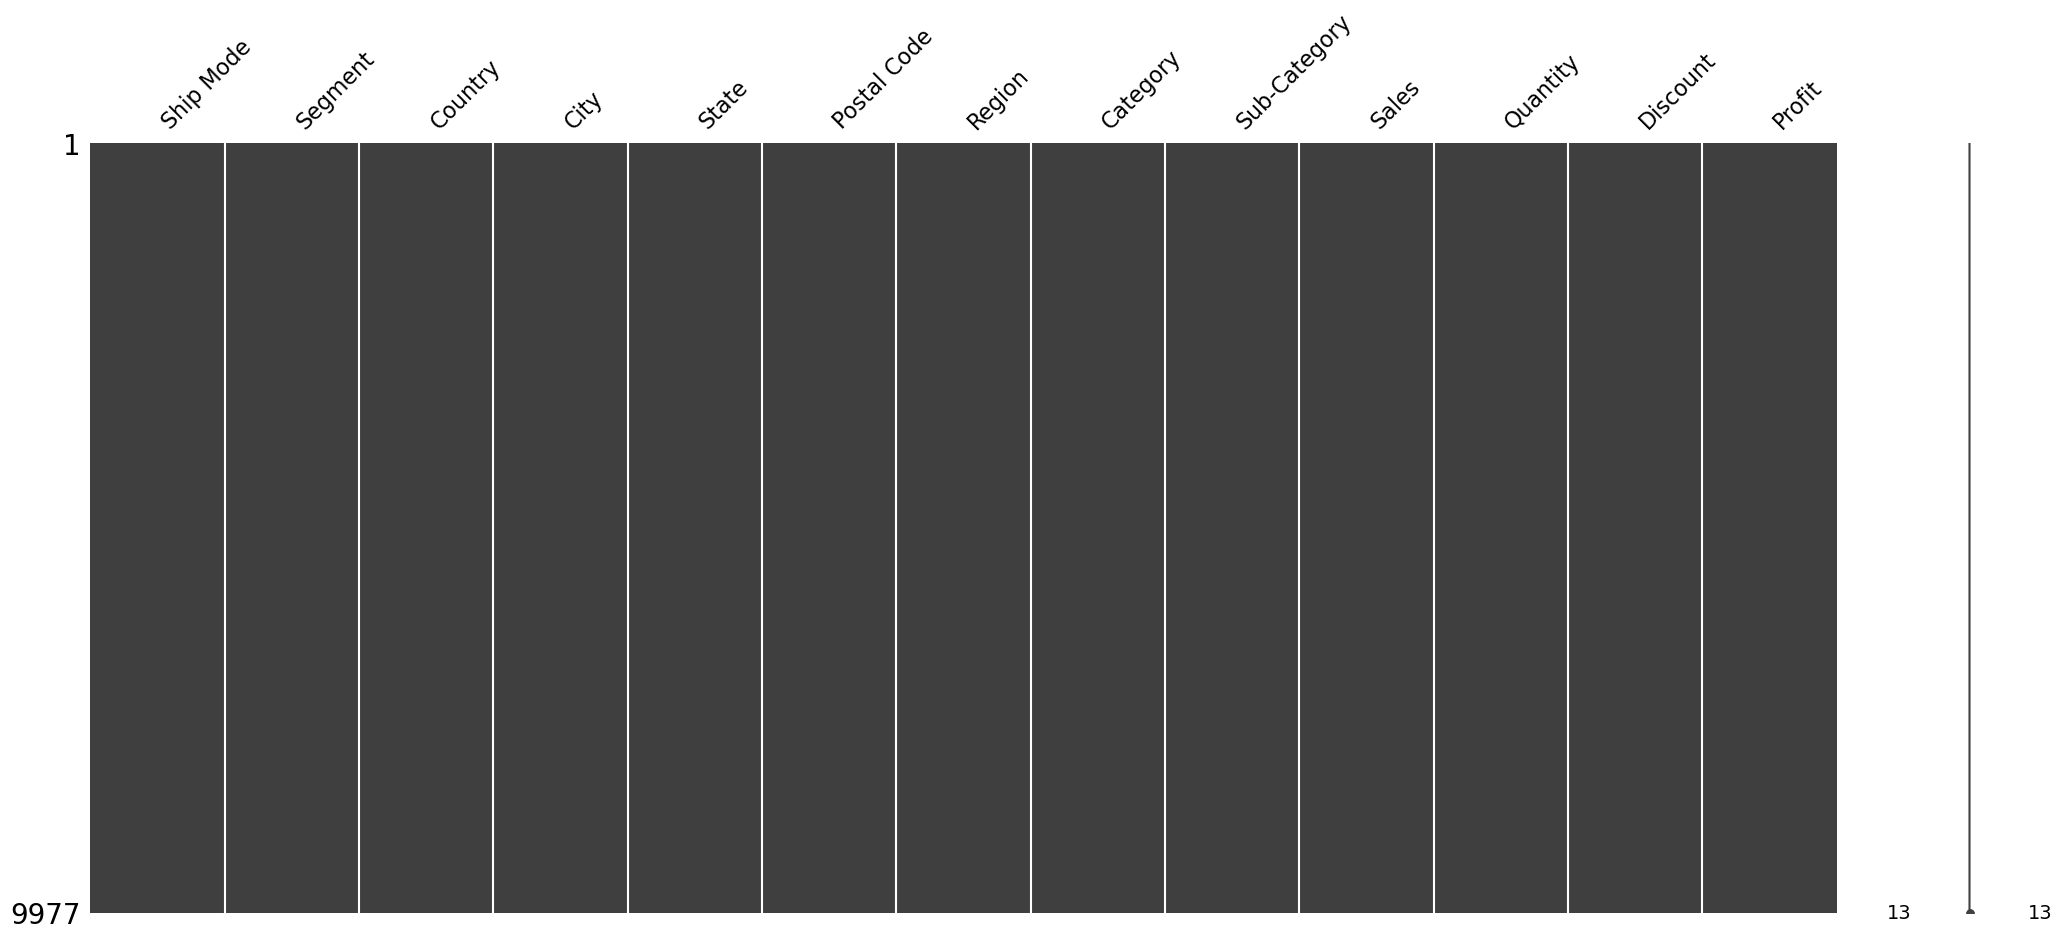

In [138]:
# Checking for missing values in the data
msno.matrix(store_data)

The chart above shows that the data has no missing values but we still need to be sure that everything is in order as such we will be validating the data just to be on the safe side.

In [143]:
# Checking the unique values of categorical data in store_data
unq_cate_data = store_data.describe(include = 'object')
display(unq_cate_data)

# Checking the unique values of the numerical data in the store_data
unq_num_data = store_data.describe()
display(unq_num_data)

# Checking to see if all the listed states are all actually there
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]

# Find the missing state
missing_states = set(states) - set(store_data['State'].unique())
print("Missing states:", missing_states)


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


Missing states: {'Alaska', 'Hawaii'}


For the store_data after trying to validate the data because the city columns had a whooping 531 unique cities, although i could get to check the values and found out that no misspelled words were present and the as for the state column, the unique value is 49 this shows that the data doesn't cover all the states in the united states, since Hawaii wasn't included in the dataset.
Just for reference; There are 50 states in the United States. Some of the most well-known ones include California, Texas, New York, and Florida. The last two states to join were:

Alaska (49th state) in 1959
Hawaii (50th state) in 1959

So Hawaii wasn't added in the data and Alaska too.

## Now it's time to Analyze the data

## How do shipping modes vary by region in terms of sales and profit?

In [ ]:
# Checking which segment has the highest shipping mode
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Ship Mode', y = 'Sales', data = store_data, hue = 'Segment', palette = 'set2')
plt.title('Sales Distribution by Category and Region')
plt.show()

In [144]:
display(store_data)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200
